# Final Project 
## Caitlin Sizemore 
### DS 160-01 


### Import Libraries and Load Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset=pd.read_csv("loan-train.csv")

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Drop Column and Missing Values

In [5]:
dataset=dataset[['Gender','Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

# drop Loan_ID - not important for logistic regression analysis

In [6]:
dataset.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
dataset.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Count'>

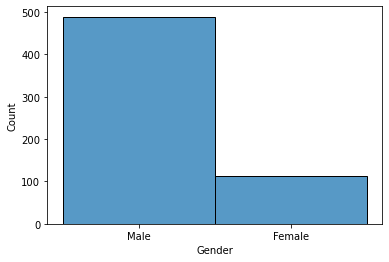

In [8]:
sns.histplot(dataset['Gender'])

In [9]:
gen_mode=dataset['Gender'].mode().iloc[0]
dataset['Gender'].fillna(gen_mode, inplace=True)

<AxesSubplot:xlabel='Married', ylabel='Count'>

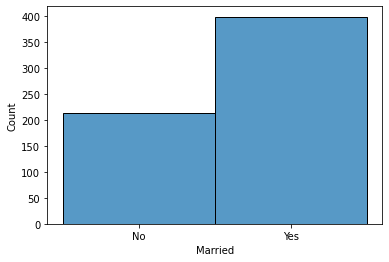

In [10]:
sns.histplot(dataset['Married'])

In [11]:
mar_mode=dataset['Married'].mode().iloc[0]
dataset['Married'].fillna(mar_mode, inplace=True)

<AxesSubplot:xlabel='Dependents', ylabel='Count'>

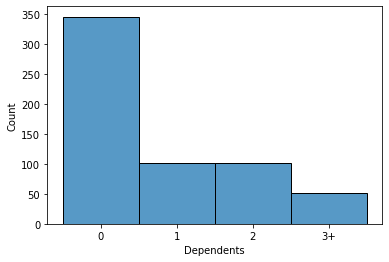

In [12]:
sns.histplot(dataset['Dependents'])

In [13]:
dep_mode=dataset['Dependents'].mode().iloc[0]
dataset['Dependents'].fillna(dep_mode, inplace=True)

<AxesSubplot:xlabel='Self_Employed', ylabel='Count'>

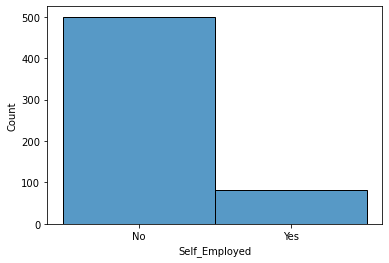

In [14]:
sns.histplot(dataset['Self_Employed'])

In [15]:
emp_mode=dataset['Self_Employed'].mode().iloc[0]
dataset['Self_Employed'].fillna(emp_mode, inplace=True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

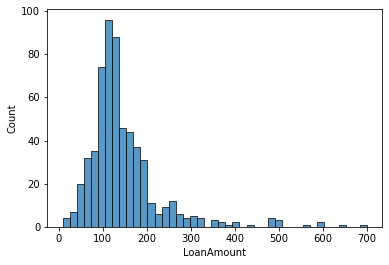

In [16]:
sns.histplot(dataset['LoanAmount'])

In [17]:
amount_median=dataset['LoanAmount'].median()
dataset['LoanAmount'].fillna(amount_median, inplace=True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

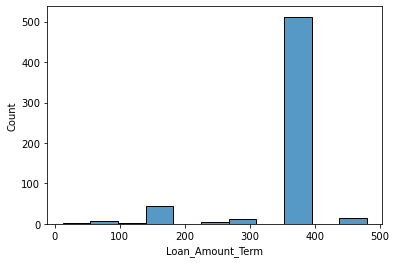

In [18]:
sns.histplot(dataset['Loan_Amount_Term'])

In [19]:
term_median=dataset['Loan_Amount_Term'].median()
dataset['Loan_Amount_Term'].fillna(term_median, inplace=True)

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

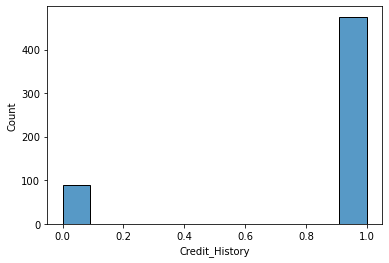

In [20]:
sns.histplot(dataset['Credit_History'])

In [21]:
credit_median=dataset['Credit_History'].median()
dataset['Credit_History'].fillna(credit_median, inplace=True)

In [22]:
dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Split into Independent and Dependent

In [23]:
X=dataset.drop('Loan_Status', axis=1)

In [24]:
y=dataset[['Loan_Status']]

In [25]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


### Categorical Variables

In [26]:
X=pd.get_dummies(dataset[['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome', 
                          'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 
                          'Property_Area']], drop_first=True)

In [27]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1


- Male 1
- Female 0 

- Married Yes 1 
- Married No 0 

- Graduate 0
- Not Graduate 1

- Self Employed 1
- Not Self Employed 0

- Semiurban 10
- Urban 01
- Rural 00

## Experiment 1: 

### Split into Train and Test Set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2, random_state=42)

### Training Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=1000)

### Confusion Matrix

In [30]:
y_pred=classifier.predict(X_test.values)

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[18 25]
 [ 1 79]]


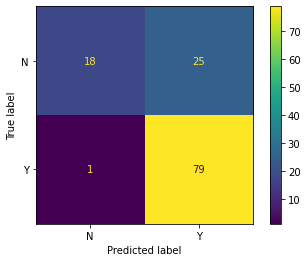

In [32]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

- 18 True Negative 
- 79 True Positive
- 1 False Negative
- 25 False Positive

### Classification Report

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



- 79% accurate with an 80/20 split

## Experiment 2

### Split into Train and Test Set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.25, random_state=42)

### Training Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=1000)

### Confusion Matrix

In [36]:
y_pred=classifier.predict(X_test.values)

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[21 33]
 [ 2 98]]


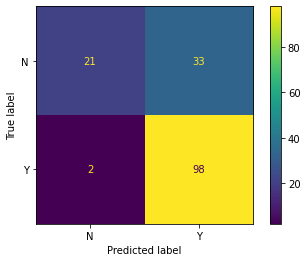

In [38]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

- 21 True Negative 
- 98 True Positive
- 2 False Negative
- 33 False Positive

### Classification Report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.91      0.39      0.55        54
           Y       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



- 77% accurate with an 75/25 split

## Experiment 3

### Split into Train and Test Set

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.35, random_state=42)

### Training Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=1000)

### Confusion Matrix

In [42]:
y_pred=classifier.predict(X_test.values)

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[ 24  53]
 [  0 138]]


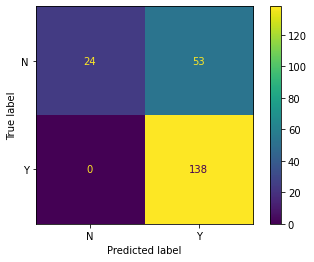

In [44]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

- 24 True Negative 
- 138 True Positive
- 0 False Negative
- 53 False Positive

### Classification Report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       1.00      0.31      0.48        77
           Y       0.72      1.00      0.84       138

    accuracy                           0.75       215
   macro avg       0.86      0.66      0.66       215
weighted avg       0.82      0.75      0.71       215



- 75% accurate with an 65/35 split